In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel("../data/menu_data.xlsx")

In [3]:
df.head()

,메뉴,소스,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,8,"['4', '5']",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,11,"['5', '14']",0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,18,"['5', '14']",0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,8,"['3', '5']",0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,5,"['1', '3', '5']",0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
sauce = {2:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         3:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         4:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         5:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         6:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         7:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         8:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         9:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         10:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         11:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         12:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         13:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         14:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0}, 
         15:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         16:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0}, 
         17:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0},
         18:{'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0}}

In [5]:
df['소스'] = df['소스'].apply(eval)

In [6]:
for idx in range(df[['메뉴']].size):
    menu = df.iloc[idx, 0]
    for i in df.iloc[idx, 1]:
        sauce[menu][i] += 1

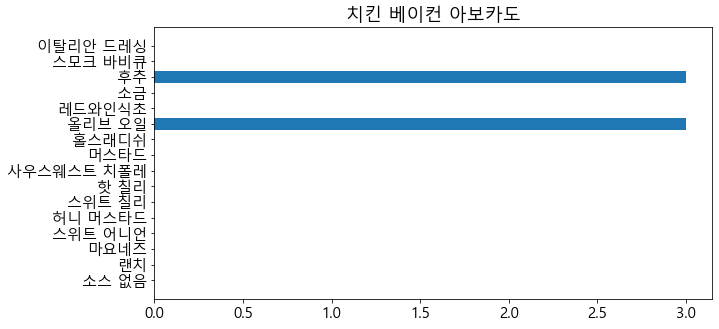

In [25]:
labels = ['소스 없음', '랜치', '마요네즈', '스위트 어니언', '허니 머스타드', '스위트 칠리', '핫 칠리', '사우스웨스트 치폴레',
          '머스타드', '홀스래디쉬', '올리브 오일', '레드와인식초', '소금', '후추', '스모크 바비큐', '이탈리안 드레싱']
values = list(sauce[2].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("치킨 베이컨 아보카도")
plt.show()

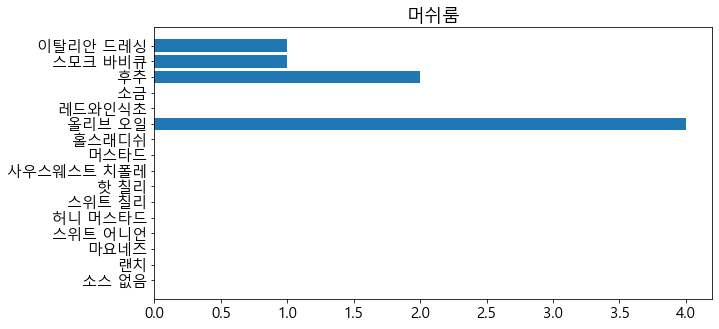

In [26]:
values = list(sauce[3].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("머쉬룸")
plt.show()

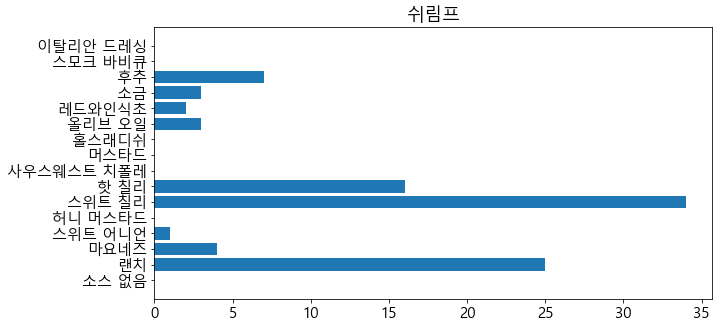

In [27]:
values = list(sauce[4].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("쉬림프")
plt.show()

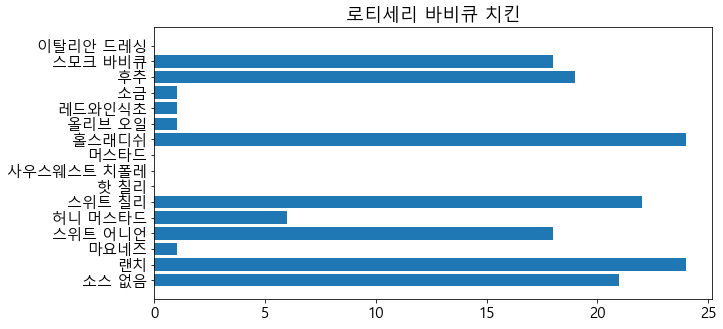

In [28]:
values = list(sauce[5].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("로티세리 바비큐 치킨")
plt.show()

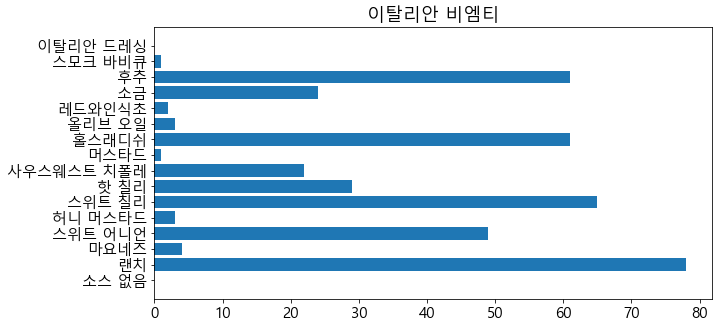

In [29]:
values = list(sauce[6].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("이탈리안 비엠티")
plt.show()

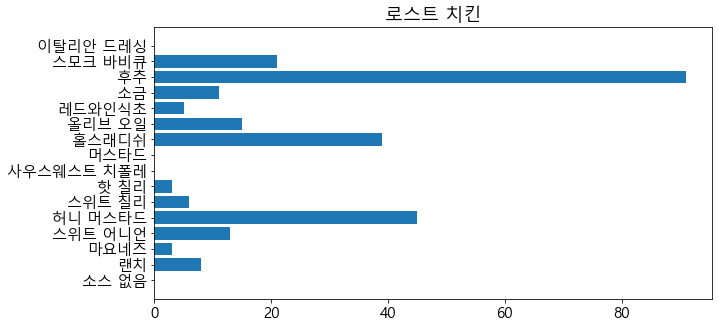

In [30]:
values = list(sauce[7].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("로스트 치킨")
plt.show()

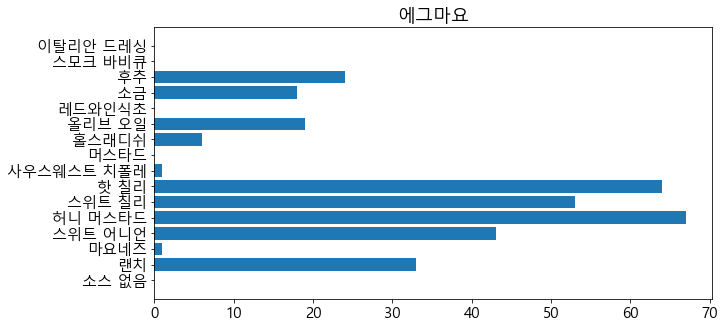

In [31]:
values = list(sauce[8].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("에그마요")
plt.show()

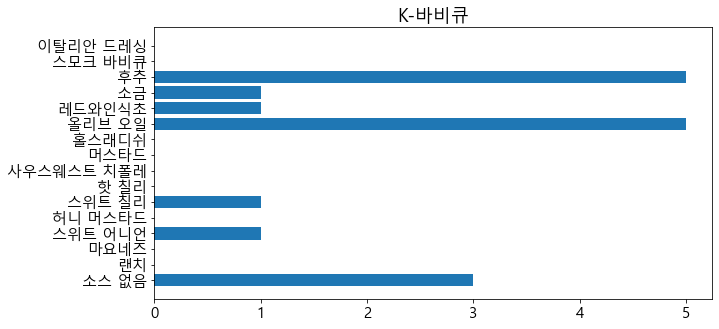

In [32]:
values = list(sauce[9].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("K-바비큐")
plt.show()

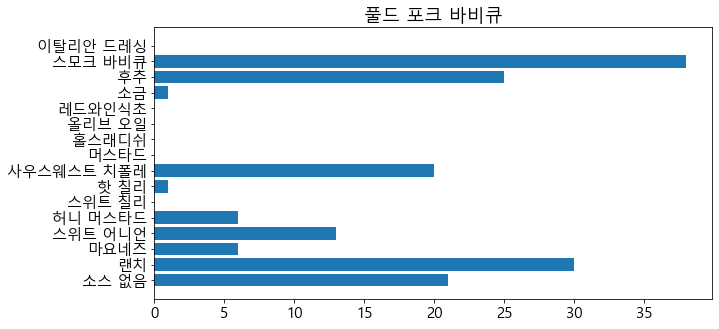

In [34]:
values = list(sauce[10].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("풀드 포크 바비큐")
plt.show()

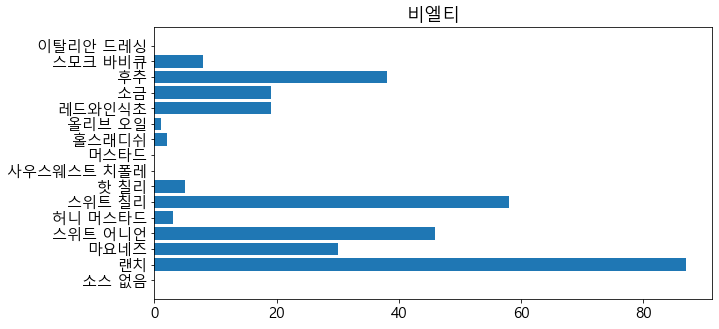

In [35]:
values = list(sauce[11].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("비엘티")
plt.show()

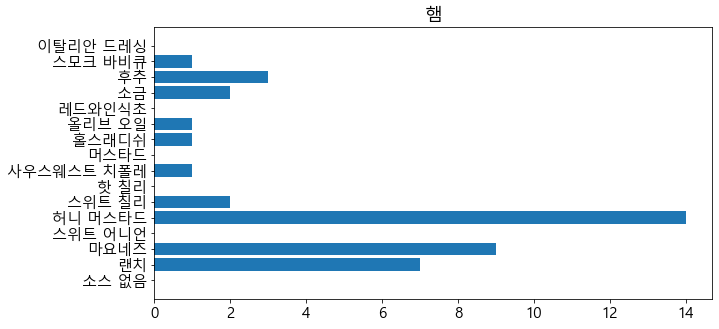

In [36]:
values = list(sauce[12].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("햄")
plt.show()

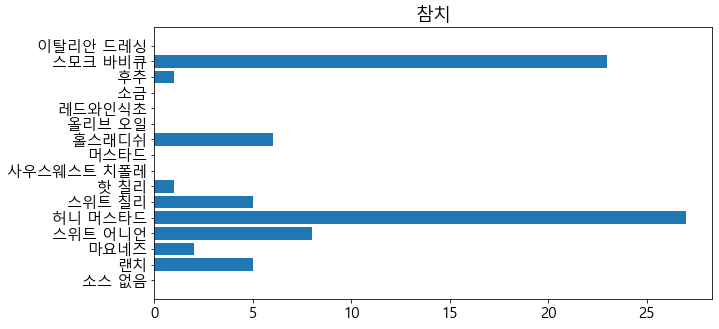

In [37]:
values = list(sauce[13].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("참치")
plt.show()

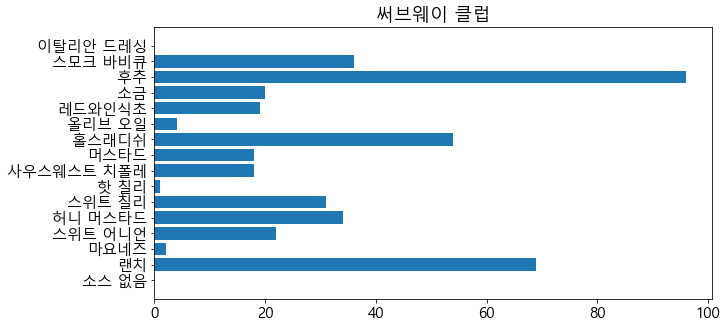

In [38]:
values = list(sauce[14].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("써브웨이 클럽")
plt.show()

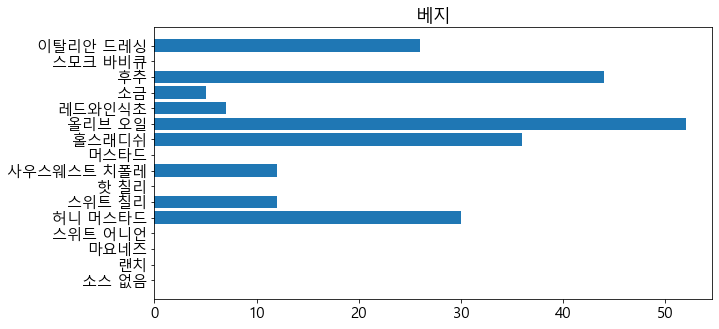

In [39]:
values = list(sauce[15].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("베지")
plt.show()

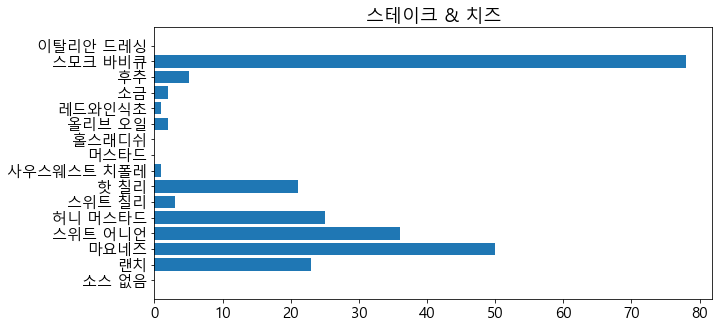

In [40]:
values = list(sauce[16].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("스테이크 & 치즈")
plt.show()

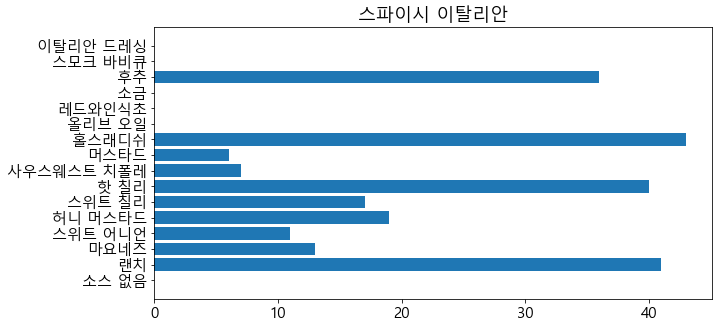

In [41]:
values = list(sauce[17].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("스파이시 이탈리안")
plt.show()

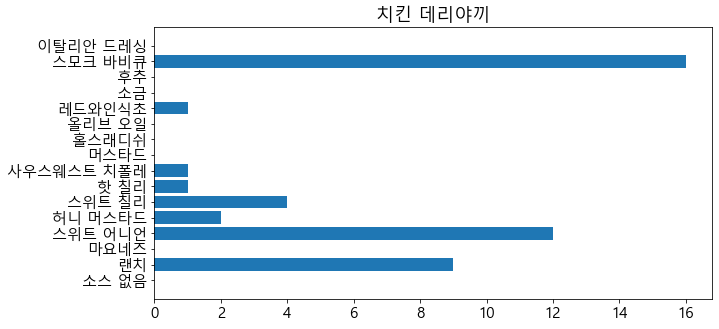

In [42]:
values = list(sauce[18].values())

plt.figure(figsize=(10, 5)) 
plt.barh(labels, values)
plt.title("치킨 데리야끼")
plt.show()